<a href="https://colab.research.google.com/github/ARJUNCO333/wholesale-customer-clustering/blob/main/Hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#2 types 
#agglomarative clustering
# divisive analysis 

# ***Aglomarative clustering***
*************************
reduce the no of clusters by joining them with minimum distance.
for the representetion we use dentogram.
to find distance bw 2 clusters we use 3 method
1.single linkage == min distance
2.complete linkage == max distance
3.avg linkage == avg distance

***Divisive analysis***

it is an up to down process.the datapoints which are least similer is removed from the cluster.

In [ ]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214.0,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762.0,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405.0,3516.0,7844.0
3,1,3,13265,1196,4221.0,6404.0,507.0,1788.0
4,2,3,22615,5410,7198.0,3915.0,1777.0,5185.0
...,...,...,...,...,...,...,...,...
411,1,3,3,12051,16027.0,13135.0,182.0,2204.0
412,1,3,39228,1431,764.0,4510.0,93.0,2346.0
413,2,3,14531,15488,30243.0,437.0,14841.0,1867.0
414,1,3,10290,1981,2232.0,1038.0,168.0,2125.0


In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214.0,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762.0,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405.0,3516.0,7844.0
3,1,3,13265,1196,4221.0,6404.0,507.0,1788.0
4,2,3,22615,5410,7198.0,3915.0,1777.0,5185.0


In [ ]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
411,1,3,3,12051,16027.0,13135.0,182.0,2204.0
412,1,3,39228,1431,764.0,4510.0,93.0,2346.0
413,2,3,14531,15488,30243.0,437.0,14841.0,1867.0
414,1,3,10290,1981,2232.0,1038.0,168.0,2125.0
415,1,3,2787,1698,2510.0,65.0,477.0,52.0


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,416.000000,416.000000,416.000000,4.160000e+02,415.000000,415.000000,413.000000,414.000000
mean,1.322115,2.516827,12069.197115,3.144914e+05,7828.826506,3053.869880,2826.878935,1481.239130
std,0.467850,0.788291,12841.645888,6.297063e+06,9505.004592,4898.261377,4776.892505,2783.434106
min,1.000000,1.000000,3.000000,5.500000e+01,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3101.500000,1.483250e+03,2118.000000,740.500000,249.000000,409.500000
50%,1.000000,3.000000,8577.500000,3.616500e+03,4657.000000,1492.000000,761.000000,946.500000
75%,2.000000,3.000000,16933.750000,7.217500e+03,10479.000000,3512.500000,3881.000000,1783.000000
max,2.000000,3.000000,112151.000000,1.284411e+08,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           416 non-null    int64  
 1   Region            416 non-null    int64  
 2   Fresh             416 non-null    int64  
 3   Milk              416 non-null    int64  
 4   Grocery           415 non-null    float64
 5   Frozen            415 non-null    float64
 6   Detergents_Paper  413 non-null    float64
 7   Delicassen        414 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.1 KB


In [ ]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             1
Frozen              1
Detergents_Paper    3
Delicassen          2
dtype: int64

In [ ]:
for i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214.0,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762.0,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405.0,3516.0,7844.0
3,1,3,13265,1196,4221.0,6404.0,507.0,1788.0
4,2,3,22615,5410,7198.0,3915.0,1777.0,5185.0
...,...,...,...,...,...,...,...,...
411,1,3,3,12051,16027.0,13135.0,182.0,2204.0
412,1,3,39228,1431,764.0,4510.0,93.0,2346.0
413,2,3,14531,15488,30243.0,437.0,14841.0,1867.0
414,1,3,10290,1981,2232.0,1038.0,168.0,2125.0


In [ ]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
from sklearn.preprocessing import normalize
data_scaled=normalize(df)
data_scaled=pd.DataFrame(data_scaled,columns=df.columns)
data_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
411,0.000042,0.000125,0.000125,0.500602,0.665766,0.545632,0.007560,0.091555
412,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
413,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
414,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


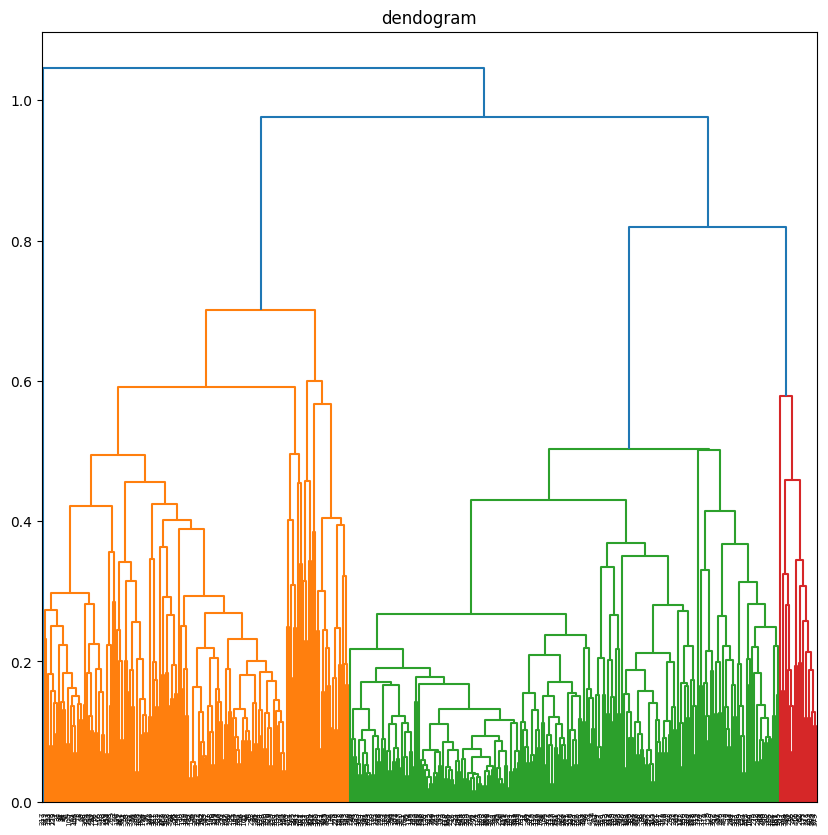

In [ ]:
#dentogram
plt.figure(figsize=(10,10))
plt.title("dendogram")
dend=shc.dendrogram(shc.linkage(data_scaled,method="average"))


In [ ]:
# agglomarative clustering
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="complete")
y=cluster.fit_predict(data_scaled)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [ ]:
df["output"]=y
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,output
0,2,3,12669,9656,7561.0,214.0,2674.0,1338.0,0
1,2,3,7057,9810,9568.0,1762.0,3293.0,1776.0,1
2,2,3,6353,8808,7684.0,2405.0,3516.0,7844.0,1
3,1,3,13265,1196,4221.0,6404.0,507.0,1788.0,0
4,2,3,22615,5410,7198.0,3915.0,1777.0,5185.0,0
...,...,...,...,...,...,...,...,...,...
411,1,3,3,12051,16027.0,13135.0,182.0,2204.0,1
412,1,3,39228,1431,764.0,4510.0,93.0,2346.0,0
413,2,3,14531,15488,30243.0,437.0,14841.0,1867.0,1
414,1,3,10290,1981,2232.0,1038.0,168.0,2125.0,0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
238,1,1,8040,3795,2070.0,6340.0,918.0,291.0
75,2,3,22925,73498,32114.0,987.0,20070.0,903.0
131,1,3,37036,7152,8253.0,2995.0,20.0,3.0
361,1,3,3884,3801,1641.0,876.0,397.0,4829.0
307,1,2,11800,2713,3558.0,2121.0,706.0,51.0
...,...,...,...,...,...,...,...,...
71,2,3,10362,9232,11009.0,737.0,3537.0,2342.0
106,1,3,6990,3880,5380.0,1647.0,319.0,1160.0
270,2,3,12238,7108,6235.0,1093.0,2328.0,2079.0
348,1,3,796,5878,2109.0,340.0,232.0,776.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=MultinomialNB()
models=[knn,svm,dt,rf,nb]

KNeighborsClassifier()
KNeighborsClassifier() <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8b99fb95a0>
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        83
           1       0.98      0.95      0.96        42

    accuracy                           0.98       125
   macro avg       0.98      0.97      0.97       125
weighted avg       0.98      0.98      0.98       125

SVC()
SVC() <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8b955147c0>
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        83
           1       0.00      0.00      0.00        42

    accuracy                           0.66       125
   macro avg       0.33      0.50      0.40       125
weighted avg       0.44      0.66      0.53       125

DecisionTreeClassifier()
DecisionTreeClassifier() <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDispl

<ipython-input-32-ea27f59453fd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df=accuracy_df.append({"model":str(i),"accuracy":accuracy},ignore_index=True)
<ipython-input-32-ea27f59453fd>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df=accuracy_df.append({"model":str(i),"accuracy":accuracy},ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

RandomForestClassifier() <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8b94871900>
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.97      0.90      0.94        42

    accuracy                           0.96       125
   macro avg       0.96      0.95      0.95       125
weighted avg       0.96      0.96      0.96       125

MultinomialNB()
MultinomialNB() <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8b946ba740>
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        83
           1       0.00      0.00      0.00        42

    accuracy                           0.66       125
   macro avg       0.33      0.50      0.40       125
weighted avg       0.44      0.66      0.53       125



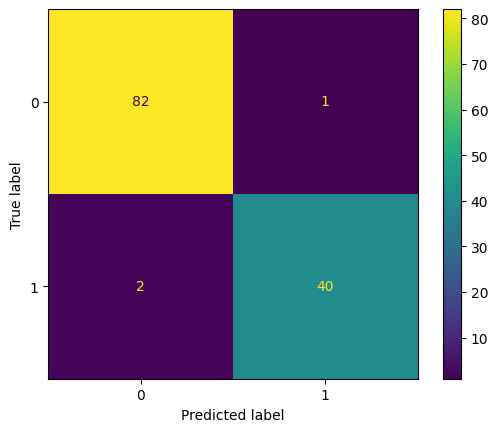

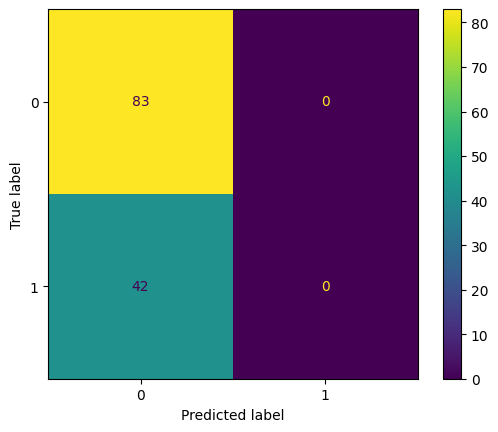

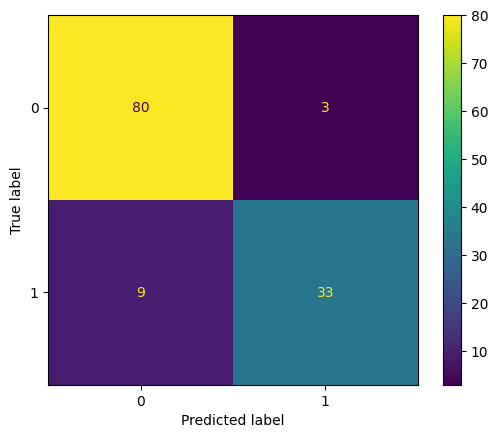

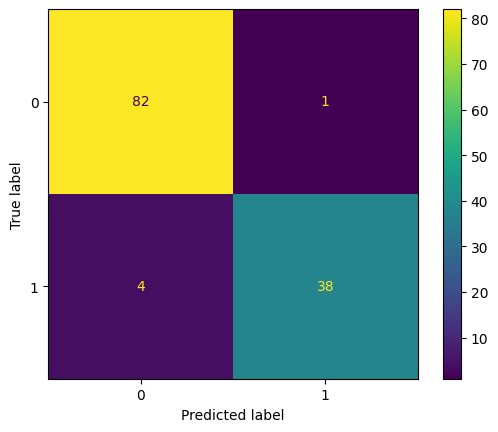

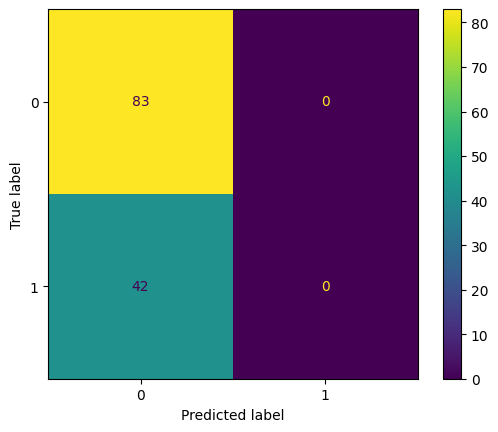

In [ ]:
accuracy_df=pd.DataFrame(columns=("model","accuracy"))
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
for i in models:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  confusion=confusion_matrix(y_test,y_pred)

  accuracy_df=accuracy_df.append({"model":str(i),"accuracy":accuracy},ignore_index=True)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print(classification_report(y_test,y_pred))



In [ ]:
accuracy_df["accuracy"]=accuracy_df["accuracy"]*100
accuracy_df.sort_values(by="accuracy",ascending=False)
accuracy_df

,model,accuracy
0,KNeighborsClassifier(),97.6
1,SVC(),66.4
2,DecisionTreeClassifier(),90.4
3,RandomForestClassifier(),96.0
4,MultinomialNB(),66.4


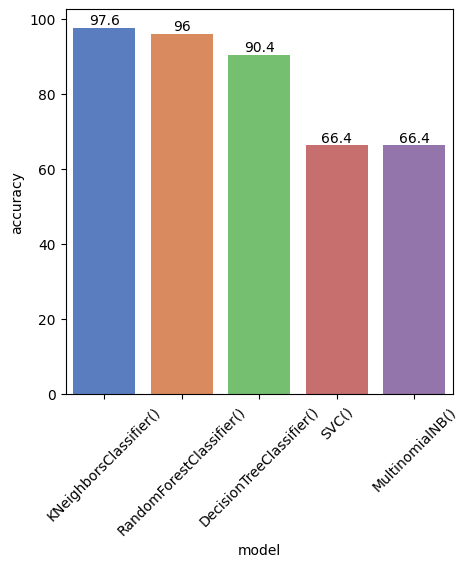

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
ax=sns.barplot(x="model",y="accuracy",palette="muted",
               data=accuracy_df.sort_values(by="accuracy",ascending=False),errwidth=0)
for i in ax.containers:
  ax.bar_label(i,)